# Урок 8. Снижение размерности данных 

**План занятия**

* [Теоретическая часть](#theory)
    * [Алгоритмы снижения размерности](#reduce)
        * [Отбор признаков](#selection)
            * [Одномерный отбор признаков](#one_selection)
            * [Переборные методы](#iterate)
            * [Встроенные в модели](#integrated)
        * [Понижение размерности ](#reduce_dims)
            * [Метод главных компонент (PCA)](#pca)
* [Домашнее задание](#hw)

## <center>Теоретическая часть<a class="anchor" id="theory"></a><center>

Большая размерность данных (под ней понимается размерность пространства признаков, то есть их количество) может серьезно усложнить задачу анализа таких данных и даже стать причиной некорректной работы некоторых алгоритмов. Кроме того, часто в исходных данных могут присутствовать лишние признаки, никак не связанные с целевой переменной. Поэтому часто встает задача понижения количества признаков, оставляя при этом самые значимые (наиболее сильно влияющие на значение целевого параметра) с отсечением менее значимых (наиболее слабо коррелирующих со значением целевого параметра) или с формированием новых признаков на основе старых. То есть ставится задача перехода от пространства большей размерности к пространству меньшей размерности с сохранением максимального количества полезной информации.

## Алгоритмы снижения размерности <a class='anchor' id='reduce'>

Алгоритмы снижения размерности пространства признаков делятся на две группы - **отбор признаков** (то есть отбрасывание наименее важных признаков) и **понижение размерности** путем формирования новых признаков на основе старых.

## Отбор признаков <a class='anchor' id='selection'>

### Одномерный отбор признаков <a class='anchor' id='one_selection'>

Самым простым и примитивным методом отбора является _одномерный отбор признаков_. Он заключается в оценке предсказательной силы каждого признака, то есть его информативности - насколько он коррелирует с целевой переменной. Затем отбираются либо заданное количество $k$ признаков, либо те признаки, информативность которых выше некоторого порога.

Оценка предсказательной силы признака (или степени связи этого признака и целевой переменной) может проводиться разными методами, например:

- в случае регрессии - _корреляция_ $$R_{j} = \frac{\sum_{i=1}^{l}(x_{ij} - \bar{x}_{j})(y_{i} - \bar{y})}{\sqrt{\sum_{i=1}^{l}(x_{ij} - \bar{x}_{j})^{2}\sum_{i=1}^{l}(y_{i} - \bar{y})^{2}}},$$ где $\bar{x_{j}}$ и $\bar{y}$ - среднее значение $j$-го признака и целевой переменной, соответственно. Чем больше по модулю корреляция ($\pm 1$), тем информативнее признак. Следует заметить, что этот метод учитывает только линейную связь между признаком и целевой переменной.

In [1]:
import numpy as np
from sklearn.datasets import make_regression

np.random.seed(9)
X_rgr, y_rgr = make_regression(n_samples=1000, n_features=2, n_informative=1, n_targets=1)

display(X_rgr, y_rgr)

array([[ 1.65970362,  0.39742884],
       [ 1.53913966, -0.00891776],
       [-0.8992934 , -1.96656869],
       ...,
       [-1.47970732, -0.8396605 ],
       [ 1.27819546,  0.50111136],
       [-1.11403185, -0.81958452]])

array([ 3.38997880e+01, -7.60664818e-01, -1.67743895e+02,  1.58318169e+01,
        5.22640035e+01, -1.27843520e+01, -1.72575347e+02,  1.05195977e+01,
       -1.42697867e+02, -5.78147468e+01,  5.41343397e+01, -1.20885907e+02,
       -1.26233185e+02,  7.35265661e+01, -6.10298235e+01, -6.98925265e+00,
       -7.94462575e+01, -1.27974905e+02, -1.25318269e+02, -1.38664259e+01,
       -1.33549363e+02, -1.01513357e+02, -3.39548758e+01,  3.61540426e+01,
       -1.81778363e+02,  8.15681299e+01,  6.68779581e+01, -1.66167272e+00,
        1.84745041e+02, -1.25089770e+02, -1.78319379e+01,  3.60475828e+01,
       -5.10405100e+01,  6.00815207e+01,  1.73041738e+01, -1.26026378e+02,
       -8.04151476e+00,  8.52453688e+00,  3.70225300e+01, -6.22075809e+01,
        8.82474207e+00, -1.80644852e+01, -1.24194545e+01,  2.10893155e+01,
        1.06544988e+02,  2.73816831e+02,  7.47635374e+01,  6.74450686e+00,
       -1.39046724e+02, -3.50397872e+01,  7.08104304e+01,  1.29814899e+02,
        7.05798205e+01, -

$$R_{j} = \frac{\sum_{i=1}^{l}(x_{ij} - \bar{x}_{j})(y_{i} - \bar{y})}{\sqrt{\sum_{i=1}^{l}(x_{ij} - \bar{x}_{j})^{2}\sum_{i=1}^{l}(y_{i} - \bar{y})^{2}}}$$

In [2]:
def corr(x, y):
    mean_x = x.mean()
    mean_y = y.mean()
    corr = np.sum((x - mean_x) * (y - mean_y)) / np.sqrt(np.sum((x - mean_x)**2) * np.sum((y - mean_y) ** 2))
    return corr


print(f'Корреляция 0 признака с целевой переменной {corr(X_rgr[:, 0], y_rgr)}')
print(f'Корреляция 1 признака с целевой переменной {corr(X_rgr[:, 1], y_rgr)}')

Корреляция 0 признака с целевой переменной 0.024507486889396298
Корреляция 1 признака с целевой переменной 0.9999999999999999


In [3]:
np.corrcoef(X_rgr[:, 0], y_rgr)

array([[1.        , 0.02450749],
       [0.02450749, 1.        ]])

In [4]:
print(f'Корреляция 0 признака с целевой переменной {np.corrcoef(X_rgr[:, 0], y_rgr)[0][1]}')
print(f'Корреляция 1 признака с целевой переменной {np.corrcoef(X_rgr[:, 1], y_rgr)[0][1]}')

Корреляция 0 признака с целевой переменной 0.0245074868893963
Корреляция 1 признака с целевой переменной 1.0


- в случае задачи классификации - *взаимная информация (mutual information)*, моделирующая корреляцию между признаками и классами. **Желательно, чтобы признак был тоже дискретным.** Она использует в расчете вероятность того, что одновременно значение $j$-го признака $x_{ij}$ равно числу $v$ и значение целевой переменной $y_{i}=k$, или, другими словами, долю таких объектов от общего количества объектов в выборке $P(x=v,y=k)$. Тогда взаимная информация будет находиться как $$MI_{j}=\sum_{v \in X}\sum_{k \in Y}P(x=v,y=k)\text{log}\frac{P(x=v,y=k)}{P(x=v)P(y=k)}.$$ Здесь $P(x=v)$ и $P(y=k)$ - доли объектов, на которых значение признака равно $v$ и значение целевой переменной равно $k$, соответственно. Если признак и целевая переменная независимы, то взаимная информация обращается в ноль. В отличие от предыдущего метода, этот метод позволяет находять произвольные зависимости (в т.ч. нелинейные) в пространстве произвольной размерности.

$$P(x=v,y=k) = \frac{1}{n}\sum_{i=0}^n{[x_{ij}= v][y_i = k]}$$
$$P(x=v) = \frac{1}{n}\sum_{i=0}^n{[x_{ij}= v]}$$
$$P(y=k) = \frac{1}{n}\sum_{i=0}^n{[y_{j} = k]}$$ 

In [5]:
from sklearn.metrics import mutual_info_score
from sklearn.metrics.cluster import contingency_matrix
import pandas as pd

In [6]:
import numpy as np
from sklearn.datasets import make_classification

np.random.seed(9)
X_cls, y_cls = make_classification(n_samples=1000, n_features=2, n_informative=1, n_clusters_per_class=1,
                                   n_redundant=1, n_classes=2)
X_cls[:, 1] = np.random.randn(X_cls.shape[0])
display(X_cls, y_cls)

array([[ 0.43599538, -1.55715109],
       [ 1.43377716, -0.53632698],
       [ 0.47503278, -1.31969664],
       ...,
       [ 0.89375686, -0.8061292 ],
       [ 0.06075411,  0.59480138],
       [-0.39229455,  2.05593842]])

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,

In [7]:
len(np.unique(X_cls[:, 1]))

1000

In [8]:
# X_cls

In [9]:
X_cls[:, 0] = pd.cut(X_cls[:, 0], 10, labels=False)
X_cls[:, 1] = pd.cut(X_cls[:, 1], 10, labels=False)

In [10]:
np.unique(X_cls[:, 0])

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [11]:
contingency_matrix(y_cls, X_cls[:, 0])

array([[ 13,  67, 149, 159,  86,  24,   3,   0,   0,   0],
       [  0,   0,   2,   9,  65, 115, 143, 112,  41,  12]], dtype=int64)

In [12]:
df = pd.DataFrame(X_cls)
df['target'] = y_cls
pd.pivot_table(df, index='target', columns=1, aggfunc='count')

0                                       
1      0.0 1.0 2.0 3.0  4.0  5.0  6.0 7.0 8.0 9.0
target                                           
0        1   3  13  51  100  152  112  42  21   6
1        1   3  11  61   94  138  117  54  17   3

In [13]:
df[(df[0] == 2) & (df['target'] == 1)]

,0,1,target
276,2.0,5.0,1
729,2.0,5.0,1


In [14]:
# pd.Series(X_cls[:, 0][y_cls == 0]).value_counts()

$$MI_{j}=\sum_{v \in X}\sum_{k \in Y}P(x=v,y=k)\text{log}\frac{P(x=v,y=k)}{P(x=v)P(y=k)}.$$

In [15]:
contingency_matrix(y_cls, X_cls[:, 0])

array([[ 13,  67, 149, 159,  86,  24,   3,   0,   0,   0],
       [  0,   0,   2,   9,  65, 115, 143, 112,  41,  12]], dtype=int64)

In [16]:
def get_mi(x, y):
    mi = 0
    cm = contingency_matrix(y, x)
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            size = np.sum(cm)
            p_x_y = cm[i][j] / size
            p_x = np.sum(cm[:, j]) / size
            p_y = np.sum(cm[i]) / size

            if p_x_y == 0:
                continue
            mi += p_x_y * np.log(p_x_y / (p_x * p_y))
    return mi

In [17]:
print(f'Взаимная информация 0 признака с целевой переменной {get_mi(X_cls[:, 0], y_cls)}')
print(f'Взаимная информация 1 признака с целевой переменной {get_mi(X_cls[:, 1], y_cls)}')

Взаимная информация 0 признака с целевой переменной 0.4656395068265237
Взаимная информация 1 признака с целевой переменной 0.0024864832627259493


In [18]:
print(f'Взаимная информация 0 признака с целевой переменной {mutual_info_score(X_cls[:, 0], y_cls)}')
print(f'Взаимная информация 1 признака с целевой переменной {mutual_info_score(X_cls[:, 1], y_cls)}')

Взаимная информация 0 признака с целевой переменной 0.4656395068265234
Взаимная информация 1 признака с целевой переменной 0.0024864832627257364


Такие методы позволяют оценить важность исключительно каждого признака отдельно, без учета влияния комбинаций признаков на целевую переменную, поэтому они и называются одномерными. На практике зачастую признаки влияют именно в совокупности, и по отдельности могут ошибочно быть расценены как некоррелирующие с целевой переменной, поэтому одномерные методы отбора не являются оптимальным методом в большинстве случаев.

У одномерного отбора признаков есть проблема - они не учитывают взаимосвязь признаков, зависимость целевой переменной от сложной комбинации признаков.
<img src='images/problem_1dim.png' width=400>

### Переборные методы <a class='anchor' id='iterate'>

Отдельной группой методов можно назвать так называемые *переборные методы*, которые дискретно оценивают качество модели, обученной на различных подмножествах признаков. При этом происходит полный перебор всех возможных вариантов. Обычно такие алгоритмы делятся на _жадные (greedy)_ и *нежадные (non-greedy)*.

Жадность алгоритмов заключаются в том, что если один из признаков включен в подмножество (или исключен в случае исключающего метода), в следующих итерациях поиска он уже не учитывается, так что алгоритм работает на меньшем объеме данных. Известные алгоритмы этого типа - _жадное включение_ и _жадное исключение_. В случае жадного включения на первой итерации аналогично одномерному отбору признаков находится признак, обладающий наибольшей предсказательной силой и добавляется в формирующуееся подмножество $\{i_{1}\}$. Далее происходит перебор оставшихся признаков с попеременным добавлением каждого из них в подмножество к первому и оценкой качества получаемой модели, обученной на подмножестве из этих двух признаков $\{i_{1}, i_{2}\}$. В итоге в подмножестве остается тот признак, при добавлении которого получается наилучшее качество. Далее эта процедура повторяется до момента, пока ошибка получаемой модели уменьшается. На каждой итерации в подмножество добавляется один признак, максимально улучшающий работу модели. Если на какой-то итерации при добавлении признаков ошибка не уменьшается, процесс останавливается.

Плюсом такого алгоритма является относительная быстрота и возможность учета некоторых взаимодействий между признаками (как раз то, чего лишен одномерный отбор). Минусом же можно назвать вероятность застрять в локальном минимуме ошибки, если такой есть. В случае же когда есть единственный глобальный минимум, алгоритм найдет оптимальное решение. Добавив признак однажды, мы уже не сможем его убрать из обучения.

**Пример жадного алгоритма:**

Есть 3 признака ($x_1, x_2, x_3$)<br>
Будем обучать алгоритм:
1. Находим лучший признак: обучаемся на $x_1$; $x_2$; $x_3$. Получаем $x_1$
2. Находим признак, который сильнее всего уменьшает ошибку: обучаемся на $x_2$; $x_3$. Получаем $x_2$
3. Снова ищем признак, который сильнее всего уменьшает ошибку: обучаемся на $x_3$. Получаем $x_3$

Так далаем до тех пор, пока уменьшается ошибка.

Есть также модификации этого алгоритма с многократным проходом по выборке и поочередным включением/исключением признаков из подмножества для учета совокупного влияния признаков. Он менее жадный и может исправлять ошибки перебора, которые могли допустить ранее.

**Пример менее жадного алгоритма (ADD-DEL):**

1. Добавляем признаки, пока уменьшается ошибка (пример жадного алгоритма выше)
2. Удаляем признаки, пока уменьшается ошибка
3. Повторяем пунткы 1 и 2, пока уменьшается ошибка 

Примером нежадного алгоритма может быть простой последовательный полный перебор всех возможных подмножеств признаков. Такой подбор позволяет найти наиболее оптимальное подмножество признаков, но, очевидно, он является достаточно трудоемким, поэтому подходит только для датасетов с небольшим количеством признаков.

**Пример нежадного алгоритма:**

Есть 3 признака ($x_1, x_2, x_3$)<br>
Будем обучать алгоритм на подмножестве:
- мощностью 1: $x_1$; $x_2$; $x_3$
- мощностью 2: $x_1$ $x_2$; $x_1$ $x_3$; $x_2$ $x_3$
- мощностью 3: $x_1$ $x_2$ $x_3$

### Встроенные в модели <a class='anchor' id='integrated'>

Еще одна группа методов отбора признаков - _встроенные в модели_. Они используют эвристики, заложенные в обучающие модели, для оценки важности признаков.

- Например, в случае работы с линейными моделями мы имеем зависимость целевой переменной от взвешенной суммы признаков $$a(x) = \sum_{i=1}^{n}w_{i}x^{i}.$$ Здесь, если признаки масштабированы, веса будут являться показателями информативности признаков: чем больше вес, тем больший вклад данный признак вносит в значение целевой переменной. На основе этого показателя можно проводить отбор признаков. Также, вспоминая уроки по линейным моделям, можно упомянуть, что использование $L_{1}$-регуляризации приводит к занулению весов наименее важных признаков, то есть к их отбрасыванию, при этом больший коэффициент регуляризации будет приводить к большему количеству зануленных весов.

In [19]:
from sklearn.linear_model import LinearRegression, Lasso

lr = LinearRegression()

lr.fit(X_rgr, y_rgr)

display(lr.coef_)

array([ 0.        , 85.29775533])

In [20]:
lasso = Lasso(alpha=20)

lasso.fit(X_rgr, y_rgr)

display(lasso.coef_)

array([ 0.        , 65.94929533])

- В случае использования решающих деревьев и их композиций, где в каждой вершине происходит разбиение на два поддерева путем сравнивания значения одного признака с некоторым значением порога, важность признака можно оценивать по тому, насколько он уменьшает значение критерия информативности, по которому оценивается качество разбиения: $$Q(X_{m}, j, t) = H(X_{m}) - \frac{|X_{l}|}{|X_{m}|}H(X_{l}) - \frac{|X_{r}|}{|X_{m}|}H(X_{r}),$$ где $X_{m}$ - множество объектов, попавших в вершину на данном шаге, $X_{l}$ и $X_{r}$ - множества, попадающие в левое и правое поддерево, соответственно, после разбиения. $H(X)$ - критерий информативности. 
    
    Чем сильнее падает критерий информативности при разбиении по данному признаку (то есть чем выше $Q$), тем этот признак важнее. Таким образом, важность $j$-го признака можно оценить путем вычисления суммы уменьшений критерия информативности по всем вершинам, в которых делалось разбиение по данному признаку. Чем больше эта сумма, тем важнее данный признак был при построении дерева. В случае композиций деревьев этот показатель суммируется по всем деревьям.

array([2.00450649e-05, 9.99979955e-01])

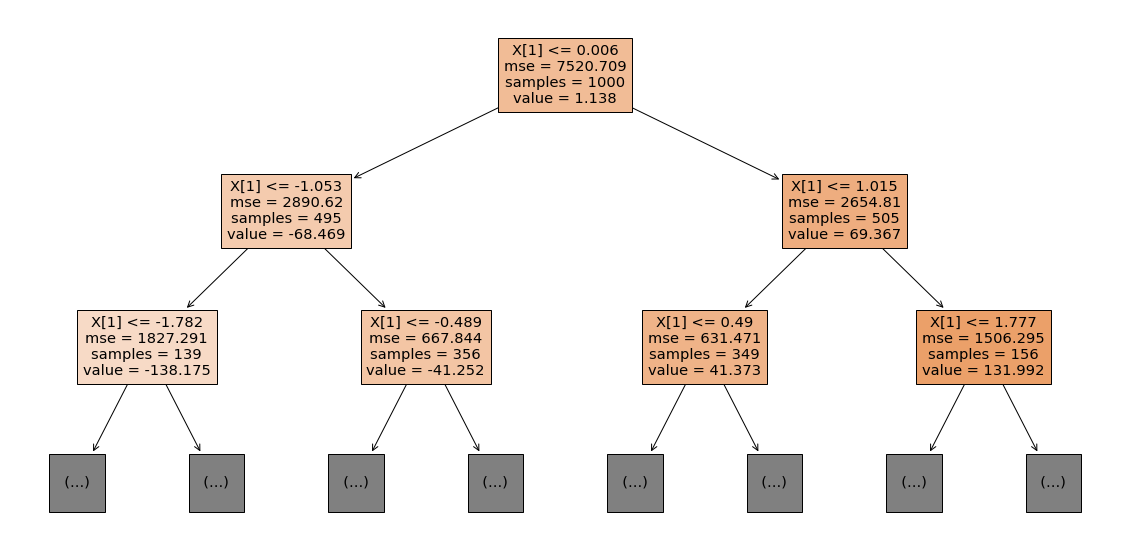

In [21]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

tree = DecisionTreeRegressor()

tree.fit(X_rgr, y_rgr)

display(tree.feature_importances_)

fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(tree, ax=ax, filled=True, max_depth=2);

In [22]:
1 - 
2 - shuffle

SyntaxError: invalid syntax (<ipython-input-22-0ea51176c746>, line 1)

In [23]:
permutation_importance(tree, X_rgr, y_rgr)

{'importances_mean': array([2.74338817e-05, 1.98193790e+00]),
 'importances_std': array([1.33192097e-05, 2.47072217e-02]),
 'importances': array([[1.27603104e-05, 4.93755172e-05, 3.55423093e-05, 1.79718225e-05,
         2.15194490e-05],
        [1.96881281e+00, 1.98590444e+00, 1.99367348e+00, 2.01754917e+00,
         1.94374961e+00]])}

## Понижение размерности <a class='anchor' id='reduce_dims'>

### **Для чего может быть полезно понижение размерности:**

*1. Визуализация*

Тяжело визуализировать многомерное простаранство
<img src='images/6dims.png' width=300>
*2. Сжатие с сохранением смысла*

Все признаки важные, отбрасывать их нельзя, но можно их сжать
<img src='images/pca_reduce.png' width=300>
*3. Абстрактные признаки*

Получить новые признаки на основе старых
<img src='images/retail.png' width=500>

### Метод случайных проекций

Кроме отбора признаков, который не всегда оптимален в плане сохранения максимума полезной информации, существуют еще методы понижения размерности путем формирования новых признаков на основе старых. Новых признаков при использовании такого метода должно быть меньше, чем исходных, при условии сохранения максимально возможного количества информации из исходных признаков. Например, объединение нескольких признаков в линейную комбинацию:

$$z_{ij}=\sum_{k=1}^{D}w_{jk}x_{ik},$$

где $x_{ij}$ - исходные признаки, $z_{ij}$ - новые признаки, а $w_{jk}$ - вклад исходного k-го признака в новый j-й.

Простейшим методов такого понижения размерности является метод *случайных проекций*, который заключается в преобразованиях, сохраняющих расстояния и снижающих размерности.

Линейный подход $z_{ij}=\sum_{k=1}^{n}w_{jk}x_{ik}$, выбор весов случайный $w_{jk}\sim N(0, \frac{1}{d})$.

Можем спроецировать выборку в пространство меньшей размерности, при этом расстояния между объектами мало изменятся.

Существование таких преобразований доказано для выборок, в которых объектов меньше, чем признаков. Веса при всех признаках в таком методе можно выбирать случайно. При этом не факт, что мы попадем в оптимальное преобразование, но практика показывает, что метод работает, если размерность нового пространства признаков

$$d > \frac{8\text{ln}l}{\varepsilon^{2}},$$

где $l$ - количество объектов, $\varepsilon$ - максимальное изменение расстояния между объектами (лемма о малом искажении или лемма Джонсона-Линденштраусса).

Хорошо работает для текстов, где признаков очень много.

In [24]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

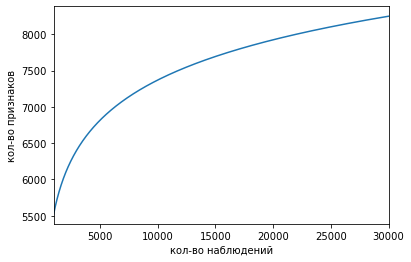

In [25]:
eps = 1e-1

dots = np.linspace(1000, 30000, 1000)
fs = list(map(lambda l: 8 * np.log(l) / eps ** 2, dots))

plt.xlabel('кол-во наблюдений')
plt.ylabel('кол-во признаков')
plt.xlim(1000, 30000)
plt.plot(dots, fs);

#### Метод главных компонент (PCA) <a class='anchor' id='pca'>

Одним из наиболее известных и широко применяемых методов понижения размерности является _метод главных компонент (principal component analysis, PCA)_.
<img src="images/pca_2.png">

Запишем показанную ранее формулу линейного преобразования признаков в матричном виде:

$$Z = XW^{T},$$

где $X$ - матрица "объекты-признаки", где по строкам отложены объекты, а по столбцам - значения признаков, $Z$ - матрица новых признаков, $W^{T}$ - транспонированная матрица весов.

При этом метод главных компонент предполагает, что матрица весов должна быть ортогональной, то есть произведение $WW^{T}$ должно равняться единичной матрице. 

Приближение заключается формировании новой матрицы признаков $\tilde{X}=ZW\approx X$ с возможностью восстанавливания старых признаков по новым с максимальным уровнем точности, или, если говорить иначе, чтобы их различие было минимальным:

$$\|ZW - X\|^{2} \rightarrow \underset{Z, W}{\text{min}}.$$

$\|X\| = \sqrt{\sum_{i, j}x_{ij}^2}$ (Норма Фробениуса)

 Восстановленная матрица $ZW$ может иметь ранг меньший, чем исходная $X$, поэтому приближение будет называться низкоранговым.

По сути это задача матричного разложения: мы хотим представить матрицу X в виде произведения ZW, которые будут иметь меньший ранг. То есть хотим уменьшить ранг, потеряв как можно меньше информации.

In [27]:
10 features
6 informative
4 redundant

rank = 6

SyntaxError: invalid syntax (<ipython-input-27-83602f1097de>, line 1)

Если ранг матрицы исходных признаков $rank(X) \geq d$, где $d$ - число новых признаков, то минимум функционала различия, описанного выше, достигается тогда, когда в качестве строк матрицы $W$ используются собственные векторы матрицы $X^{T}X$ , соответствующие максимальным собственным значениям $\lambda_{1},...,\lambda_{d}$. Максимальные собственные значения и называются главными компонентами, от чего пошло название метода. Первая главная компонента соответствует максимальному собственному значению и т.д.

Геометрически метод можно представить как проецирование признаков на гиперплоскость с максимизацией дисперсии получаемой выборки.
<img src='https://i.stack.imgur.com/Q7HIP.gif'>

In [28]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

### Пример "на пальцах"
[Статья](https://habr.com/ru/post/304214/) про метод главных компонент

В данной выборке у нас имеются два признака, сильно коррелирующие друг с другом. С помощью алгоритма PCA мы сможем найти новый признак и выразить оба этих признака одним новым.

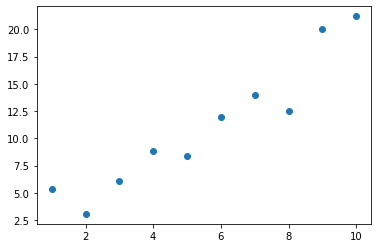

In [29]:
np.random.seed(7)
x = np.arange(1, 11)
y = 2 * x + np.random.randn(10) * 2

X = np.vstack((x,y)).T
plt.scatter(X[:, 0], X[:, 1]);


Для описания случайной величины используются мат. ожидание и дисперсия. Можно сказать, что мат. ожидание – это «центр тяжести» величины, а дисперсия – это ее «размеры». Грубо говоря, мат. ожидание задает положение случайной величины, а дисперсия – ее размер (точнее, разброс).

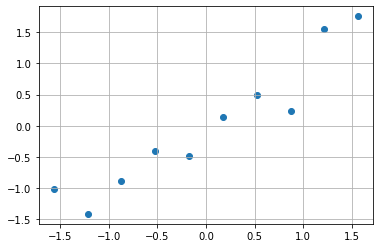

In [30]:
def standard_scale(x):
    res = (x - x.mean(axis=0)) / x.std(axis=0)
    return res


X = standard_scale(X)
plt.scatter(X[:, 0], X[:, 1])
plt.grid()

В случае с многомерной случайной величиной (случайным вектором) положение центра все так же будет являться мат. ожиданиями ее проекций на оси. А вот для описания ее формы уже недостаточно только ее дисперсий по осям. 

Для описания формы случайного вектора необходима ковариационная матрица. Ковариационная матрица является обобщением дисперсии на случай многомерных случайных величин – она так же описывает форму (разброс) случайной величины, как и дисперсия.

In [31]:
# Вычислите массив a_centered, отняв от значений массива “а” средние значения
# Найдите скалярное произведение столбцов массива a_centered. a_centered_sp на N-1, где N - число наблюдений.

def covariance(x, y):
    return np.sum(x * y) / (len(x) - 1)

print(f'Ковариация 0 признака (дисперсия 0 признака) {covariance(X[:, 0], X[:, 0])}')
print(f'Ковариация 1 признака (дисперсия 1 признака) {covariance(X[:, 1], X[:, 1])}')
print(f'Ковариация 0 и 1 признака {covariance(X[:, 0], X[:, 1])}')
cov = np.cov(X.T)
cov

Ковариация 0 признака (дисперсия 0 признака) 1.1111111111111112
Ковариация 1 признака (дисперсия 1 признака) 1.111111111111111
Ковариация 0 и 1 признака 1.055151566476865


array([[1.11111111, 1.05515157],
       [1.05515157, 1.11111111]])

In [32]:
X.T @ X / 9

array([[1.11111111, 1.05515157],
       [1.05515157, 1.11111111]])

Теперь надо найти такой вектор, при котором максимизировался бы размер (дисперсия) проекции нашей выборки на него.

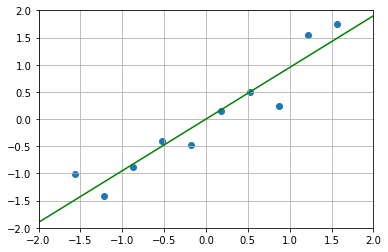

In [33]:
plt.scatter(X[:, 0], X[:, 1])
plt.grid()

plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.plot([-2, 2], list(map(lambda x: x * 0.95, [-2, 2])), c='g');

In [34]:
# X.T

Возьмем единичный вектор, на который будем проецировать вектор X. Тогда проекция на него будет равна $v^TX$. Дисперсия проекции на вектор будет соответственно равна $Var(v^TX)$. В общем виде в векторной форме (для центрированных величин) дисперсия выражается так:

$$Var(X) = \frac{1}{n}\sum_{i, j}^n{x_{ij} \cdot x^T_{ij}} = E(X \cdot X^T)$$

Дисперсия проекции:
$$Var(X^*) = E(X^* \cdot X^{*T}) = E((v^TX) \cdot (v^TX)^T) = E(v^TX \cdot X^Tv) = v^TE(X \cdot X^T)v$$

Дисперсия максимизируется при максимальном значении. У отношения Рэлея есть специальный случай для ковариационных матриц:

$$R(A, v) = \frac{v^TAv}{v^Tv} = \lambda \frac{v^Tv}{v^Tv} = \lambda$$

$$Av = \lambda v$$

Эта формула - разложение матрицы на собственные вектора и значения. v - собственный вектор, а λ – собственное значение. Количество собственных векторов и значений равны размеру матрицы.
Про геометрический смысл собственных векторов можно посмотреть [здесь ](https://www.youtube.com/watch?v=iOSiszhpQhA).

Таким образом, направление максимальной дисперсии у проекции всегда совпадает с собственным вектором, имеющим максимальное собственное значение.

In [35]:
eig_val, eig_vecs = np.linalg.eig(X.T @ X)
display(eig_val, eig_vecs)

array([19.4963641,  0.5036359])

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [36]:
vec0 = eig_vecs[:, 0]
vec1 = eig_vecs[:, 1]
vec0, vec1

(array([0.70710678, 0.70710678]), array([-0.70710678,  0.70710678]))

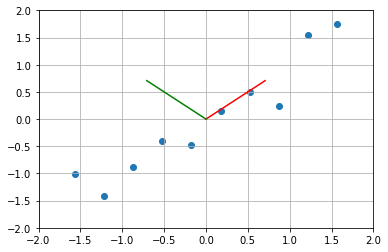

In [37]:
plt.scatter(X[:, 0], X[:, 1])
plt.grid()

plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.plot([0, vec0[0]], [0, vec0[1]], c='r')
plt.plot([0, vec1[0]], [0, vec1[1]], c='g');

Часто требуется оценить объем потерянной (и сохраненной) информации. Удобнее всего представить в процентах. Берем дисперсию по каждой из осей и делим на общую сумму дисперсий по осям (т.е. сумму всех собственных значений).

In [38]:
eig_sum = sum(eig_val)
[(i / eig_sum) * 100 for i in sorted(eig_val, reverse=True)]

[97.48182049145893, 2.518179508541074]

Таким образом, наш больший вектор описывает 97.48%, а меньший, соответственно, 2.51%. Отбросив меньший вектор и спроецировав данные на больший, мы потеряем меньше 3% информации.

На практике, если суммарная потеря информации составляет не более 10-20%, то можно спокойно снижать размерность.

Теперь нужно спроецировать данные на вектор.

In [39]:
v = vec0
Z = np.dot(X, v)
Z

array([-1.8199141 , -1.85932034, -1.24301832, -0.65735334, -0.45968116,
        0.22878749,  0.72119107,  0.78121433,  1.9589893 ,  2.34910508])

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_reduced = pca.fit_transform(X)
X_reduced

array([[-1.8199141 ],
       [-1.85932034],
       [-1.24301832],
       [-0.65735334],
       [-0.45968116],
       [ 0.22878749],
       [ 0.72119107],
       [ 0.78121433],
       [ 1.9589893 ],
       [ 2.34910508]])

In [41]:
np.linalg.eig(X.T @ X)

(array([19.4963641,  0.5036359]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [42]:
Z.T @ Z

19.49636409829178

Некоторые полезные свойства метода:

- Матрица $Z$ при этом будет такой, что $Z^{T}Z = \Lambda = diag(\lambda_{1},...,\lambda_{d})$.


- Минимизированный функционал ошибки будет равен $$\|ZW - X\|^{2} = \|X\|^{2} - tr\Lambda,$$ где $tr\Lambda,$ - след матрицы $\Lambda$, то есть сумма всех собственных значений $\lambda_{1},...,\lambda_{d}$, а $\|X\|^{2}$ - сумма всех собственных значений исходной матрицы $\lambda_{1},...,\lambda_{n}$, таким образом $$\|ZW - X\|^{2} = \sum_{j=d+1}^{n}\lambda_{j},$$ то есть значение функционала ошибки будет равно сумме собственных значений, которые не были взяты в получаемое разложение. Поэтому логично брать в разложение максимальные собственные значения, оставляя минимальные.


Таким образом, для реализации метода главных компонент нужно :
- найти собственные значения матрицы $X^{T}X$;
- отобрать $d$ максимальных;
- составить матрицу $W^{T}$, столбцы которой будут являться собственными векторами, соответствующими отобранным собственным значениям, расположенным в порядке убывания;
- получить новую матрицу "объекты-признаки", умножив исходную матрицу $X$ на матрицу весов $W$ :

$$Z=XW.$$

#### PCA и SVD

Сформулировав принцип реализации метода главных компонент, нельзя не заметить его родство с сингулярным разложением матриц (SVD). Вспомним, что сингулярное разложение матрицы - это разложение вида

$$X=UDV^{T},$$

- столбцы ортогональной матрицы $U$ - это собственные векторы матрицы $XX^{T}$
- столбцы ортогональной матрицы $V$ - собственные векторы матрицы $X^{T}X$
- на главной диагонали диагональной матрицы $D$ расположены собственные значения матриц $XX^{T}$ и $X^{T}X$ (они равны и также называются сингулярными числами матрицы $X$).

Таким образом, для реализации понижения размерности методом главных компонент с помощью SVD нужно:
- найти сингулярное разложение $X^TX$;
- сформировать из столбцов матрицы $V$, соответствующих $d$ наибольшим сингулярным числам, матрицу весов $W$;
- получить новую матрицу "объекты-признаки", умножив исходную матрицу $X$ на матрицу весов $W$:

$$Z=XW.$$

Для закрепления теории реализуем PCA с помощью Python.

### Пример на ирисах

In [43]:
# Загрузим игрушечный датасет из sklearn
iris = datasets.load_iris()
X = iris.data
X.shape

(150, 4)

In [44]:
# Для начала отмасштабируем выборку
X = X.astype(float)

X = standard_scale(X)

In [45]:
X[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [46]:
# Найдем собственные векторы и собственные значения
 
covariance_matrix = X.T @ X

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения и собственные векторы в порядке убывания:')
for i in eig_pairs:
    print(i)

Собственные значения и собственные векторы в порядке убывания:
(437.77467247979865, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]))
(137.1045707202106, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))
(22.013531335697223, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274]))
(3.1072254642929384, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))


Оценим долю дисперсии, которая описывается найденными компонентами.

In [47]:
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описываемая каждой из компонент \n{var_exp}')

# а теперь оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описываемая каждой из компонент 
[72.96244541329986, 22.850761786701792, 3.6689218892828745, 0.5178709107154903]
Кумулятивная доля дисперсии по компонентам 
[ 72.96244541  95.8132072   99.48212909 100.        ]


Таким образом, первая главная компонента описывает почти 73% информации, а первые две в сумме - 95.8%. В то же время последняя компонента описывает всего 0.5% и может быть отброжена без страха значительных потерь в качестве нашего анализа. Мы отбросим последние две компоненты, оставив первые две.

In [48]:
# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W = np.hstack([eig_pairs[i][1].reshape(4,1) for i in range(2)])

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [49]:
# Сформируем новую матрицу "объекты-признаки"
Z = X.dot(W)

In [50]:
Z[:10]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356]])

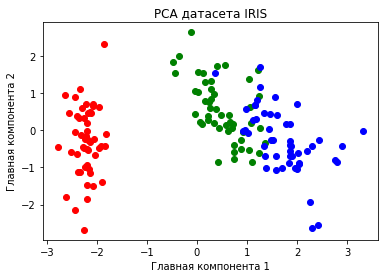

In [51]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y == i, 0], Z[y == i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

Таким образом, мы перешли от четырехмерного пространства признаков к двумерному и при этом классы остались разделимы в пространстве, то есть классификация возможна.

## Домашнее задание<a class='anchor' id='hw'>

1. Обучить любую модель классификации на датасете IRIS до применения самописного PCA (2 компоненты) и после него. Сравнить качество классификации по отложенной выборке.

In [52]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [53]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X.shape

(150, 4)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)

In [55]:
def e_metrics(x1, x2):
    distance = np.sum(np.square(x1 - x2))
    return np.sqrt(distance)

In [56]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [57]:
def knn(x_train, y_train, x_test, k, weights=None):
    
    distances = np.sqrt(np.sum(np.square(x_test[:, np.newaxis] - x_train), axis=2))
                
    answers = []    
    for distance in distances:
        test_distances = [(dist, label) for dist, label in zip(distance, y_train)]
        classes = {class_item: 0 for class_item in set(y_train)}
        
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1

        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [58]:
k = 10

%time y_pred_train = knn(X_train, y_train, X_train, k)
%time y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма на трейне при k = {k}: {accuracy(y_pred_train, y_train):.3f}')
print(f'Точность алгоритма на тесте при k = {k}: {accuracy(y_pred, y_test):.3f}')

Wall time: 9.99 ms
Wall time: 3 ms
Точность алгоритма на трейне при k = 10: 0.967
Точность алгоритма на тесте при k = 10: 0.967


In [59]:
def standard_scale(x):
    res = (x - x.mean(axis=0)) / x.std(axis=0)
    return res

In [60]:
X = X.astype(float)
X = standard_scale(X)

In [61]:
X[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [62]:
covariance_matrix = X.T @ X

eig_values, eig_vectors = np.linalg.eig(covariance_matrix)

eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:, i]) for i in range(len(eig_values))]

eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения и собственные векторы в порядке убывания:')
for i in eig_pairs:
    print(i)

Собственные значения и собственные векторы в порядке убывания:
(437.77467247979865, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]))
(137.1045707202106, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))
(22.013531335697223, array([-0.71956635,  0.24438178,  0.14212637,  0.63427274]))
(3.1072254642929384, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))


In [63]:
eig_sum = sum(eig_values)
var_exp = [(i / eig_sum) * 100 for i in sorted(eig_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описываемая каждой из компонент \n{var_exp}')

print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описываемая каждой из компонент 
[72.96244541329986, 22.850761786701792, 3.6689218892828745, 0.5178709107154903]
Кумулятивная доля дисперсии по компонентам 
[ 72.96244541  95.8132072   99.48212909 100.        ]


In [64]:
W = np.hstack([eig_pairs[i][1].reshape(4,1) for i in range(2)])

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]


In [65]:
Z = X.dot(W)

In [66]:
Z[:10]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356]])

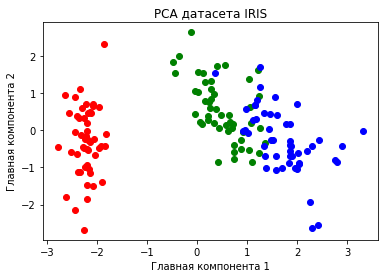

In [67]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y == i, 0], Z[y == i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()

In [68]:
Z_train, Z_test, y_z_train, y_z_test = train_test_split(Z, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)

In [69]:
k = 10

%time y_z_pred_train = knn(Z_train, y_z_train, Z_train, k)
%time y_z_pred = knn(Z_train, y_z_train, Z_test, k)

print(f'Точность алгоритма на трейне при k = {k}: {accuracy(y_z_pred_train, y_z_train):.3f}')
print(f'Точность алгоритма на тесте при k = {k}: {accuracy(y_z_pred, y_z_test):.3f}')

Wall time: 12 ms
Wall time: 3 ms
Точность алгоритма на трейне при k = 10: 0.942
Точность алгоритма на тесте при k = 10: 0.900


*Проект: 
1. https://www.kaggle.com/c/gb-tutors-expected-math-exam-results регрессия
1. https://www.kaggle.com/c/gb-choose-tutors классификация

## Дополнительные материалы

1. [Методы отбора признаков](https://habr.com/ru/company/aligntechnology/blog/303750/)
2. [Взаимная информация](https://ru.wikipedia.org/wiki/%D0%92%D0%B7%D0%B0%D0%B8%D0%BC%D0%BD%D0%B0%D1%8F_%D0%B8%D0%BD%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%86%D0%B8%D1%8F)
3. [Методы понижения размерности](http://www.machinelearning.ru/wiki/images/0/06/SLT%2C_lecture_8.pdf)
4. [Лемма о малом искажении](https://ru.wikipedia.org/wiki/%D0%9B%D0%B5%D0%BC%D0%BC%D0%B0_%D0%BE_%D0%BC%D0%B0%D0%BB%D0%BE%D0%BC_%D0%B8%D1%81%D0%BA%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B8)
5. [PCA from Scratch in Python](https://github.com/bhattbhavesh91/pca-from-scratch-iris-dataset)

## Summary

* Снижать размерность данных можно за счет
    * отбора признаков (корреляция, взаимная информация, переборные методы, вес коэфф. регрессии, feature_importances и др.)
    * понижения размерности (случайные проекции, PCA, ICA (Independent Component Analysis), NMF (Non-negative Matrix Factorization) и др.)
* Уменьшение размерности 
    * ускоряет работу моделей
    * улучшает интерпретируемость решения
    * улучшает точность модели, если были удалены шумовые и нерелевантные признаки
* В основе PCA используется понятие [_собственного вектора_](https://ru.wikipedia.org/wiki/%D0%A1%D0%BE%D0%B1%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B2%D0%B5%D0%BA%D1%82%D0%BE%D1%80) - это вектор, умножение которого на матрицу даёт коллинеарный вектор - тот же вектор, умноженный на некоторое число, называемое _собственным значением_

### Определения
*Снижение размерности*

**Снижение размерности** — это преобразование данных, состоящее в уменьшении числа переменных.

**Одномерный отбор признаков** — оценка предсказательной силы каждого признака (насколько он коррелирует с целевой переменной).

**Корреляция** — статистическая взаимосвязь двух или более случайных величин.

**Взаимная информация** — статистическая функция двух случайных величин, описывающая количество информации, содержащееся в одной случайной величине относительно другой.

**Понижение размерности** — это преобразование данных, состоящее в уменьшении числа переменных путём получения новых переменных.

**Метод главных компонент** — один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации. 